# 2.3.1 Basic Commands

In [1]:
# imports and setup
import numpy as np
from scipy.stats.stats import pearsonr

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

import math

import pandas as pd

%matplotlib inline
pd.set_option('precision', 2) # number precision for pandas
plt.style.use('seaborn') # pretty matplotlib plots

In [2]:
# array creation
x = np.array([1, 6, 2])
y = np.array([1, 4, 3])
len(x), len(y)

(3, 3)

In [3]:
# array operations
x + y

array([ 2, 10,  5])

In [4]:
# matrix creation
x = np.asmatrix(np.arange(1, 5).reshape(2, 2).transpose())
x

matrix([[1, 3],
        [2, 4]])

In [5]:
#matrix operations
np.power(x, 2)

matrix([[ 1,  9],
        [ 4, 16]])

In [6]:
# random normal distribution & correlation
x = np.random.normal(size=50)
y = x + np.random.normal(loc=50, scale=.1, size=50)
pearsonr(x, y)[0]

0.99666220645011916

In [7]:
# random seed and basic statistical functions
np.random.seed(3)
y = np.random.normal(size=100)
y.mean(), y.var(), np.sqrt(y.var()), y.std()

(-0.10863707440606224,
 1.132081888283007,
 1.0639933685333791,
 1.0639933685333791)

# 2.3.2 Graphics

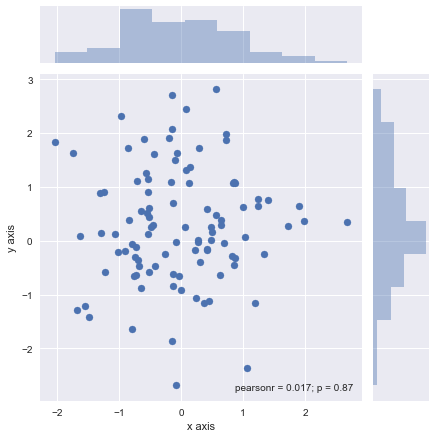

In [8]:
x = np.random.normal(size=100)
y = np.random.normal(size=100)

# seaborn scatterplot
p = sns.jointplot(x, y, kind='scatter')
p.set_axis_labels(xlabel='x axis', ylabel='y axis');

In [9]:
# create a sequence of numbers
x = np.arange(1, 11)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [10]:
# linearly spaced numbers
x = np.linspace(-np.pi, np.pi, num=50)
x

array([-3.14159265, -3.01336438, -2.88513611, -2.75690784, -2.62867957,
       -2.5004513 , -2.37222302, -2.24399475, -2.11576648, -1.98753821,
       -1.85930994, -1.73108167, -1.60285339, -1.47462512, -1.34639685,
       -1.21816858, -1.08994031, -0.96171204, -0.83348377, -0.70525549,
       -0.57702722, -0.44879895, -0.32057068, -0.19234241, -0.06411414,
        0.06411414,  0.19234241,  0.32057068,  0.44879895,  0.57702722,
        0.70525549,  0.83348377,  0.96171204,  1.08994031,  1.21816858,
        1.34639685,  1.47462512,  1.60285339,  1.73108167,  1.85930994,
        1.98753821,  2.11576648,  2.24399475,  2.37222302,  2.5004513 ,
        2.62867957,  2.75690784,  2.88513611,  3.01336438,  3.14159265])

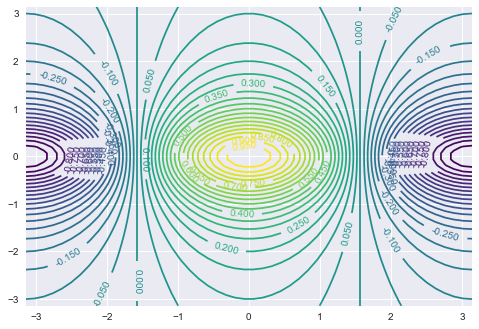

In [11]:
x = np.linspace(-np.pi, np.pi, num=50)
y = x

# simulating R outer function
def pf(a, b):
    return math.cos(b) / (1 + a**2)

f = np.empty((len(x), len(y)))
 
for i in range(len(x)):
    for j in range(len(y)):
        f[i,j] = pf(x[i], y[j])

        
# contour plot
cp = plt.contour(x, y, f, 45, cmap='viridis')
plt.clabel(cp, inline=1, fontsize=10);

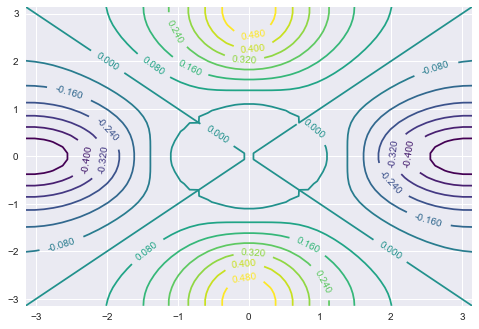

In [12]:
# contour 2
fa = (f - f.transpose())/2
cp = plt.contour(x, y, fa, 15, cmap='viridis')
plt.clabel(cp, inline=1, fontsize=10);

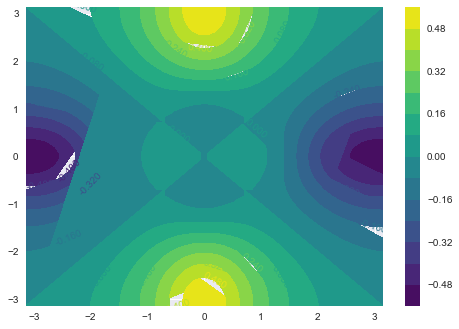

In [13]:
# heatmap
cp = plt.contourf(x, y, fa, 15, cmap='viridis')
plt.clabel(cp, inline=1, fontsize=10)
plt.colorbar();

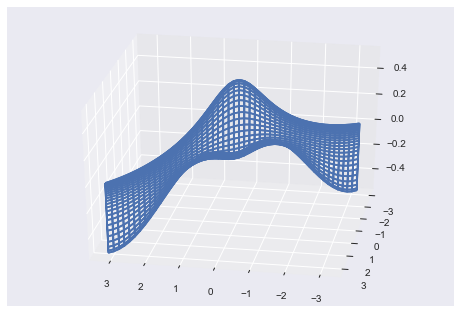

In [14]:
# 3d perspective
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, fa, cmap='viridis')
ax.view_init(30, 100);

# 2.3.3 Indexing Data

In [15]:
# matrix creation (R equivalent of matrix(1:16, 4 ,4))
A = np.asmatrix(np.arange(1, 17).reshape(4, 4).transpose())
A

matrix([[ 1,  5,  9, 13],
        [ 2,  6, 10, 14],
        [ 3,  7, 11, 15],
        [ 4,  8, 12, 16]])

In [16]:
A[1, 2]

10

In [17]:
# list selections needs explicit row repetition for multiple columns
A[[[0, 0], [2, 2]], [1, 3]] 

matrix([[ 5, 13],
        [ 7, 15]])

In [18]:
# select a range of rows and columns
A[0:3, 1:4]

matrix([[ 5,  9, 13],
        [ 6, 10, 14],
        [ 7, 11, 15]])

In [19]:
# select a range of rows and all columns
A[0:2,:]

matrix([[ 1,  5,  9, 13],
        [ 2,  6, 10, 14]])

In [20]:
# select all rows and a range of columns
A[:,0:2]

matrix([[1, 5],
        [2, 6],
        [3, 7],
        [4, 8]])

In [21]:
# shape of the matrix
A.shape

(4, 4)

# 2.3.4 Loading Data

In [22]:
# read csv data with pandas into dataframe, explicitly setting na_values.
# pandas read_xxx functions infer datatypes, headers, dates, etc. 
# without explicit declarations
Auto = pd.read_csv('../datasets/Auto.csv', na_values=['?'])
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [23]:
Auto.shape

(397, 9)

In [24]:
# dropping rows (axis-0) where there are NA values (inplace)
Auto.dropna(axis=0, inplace=True)
Auto.shape

(392, 9)

In [29]:
# get column names of the dataframe
list(Auto.columns)

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'year',
 'origin',
 'name']

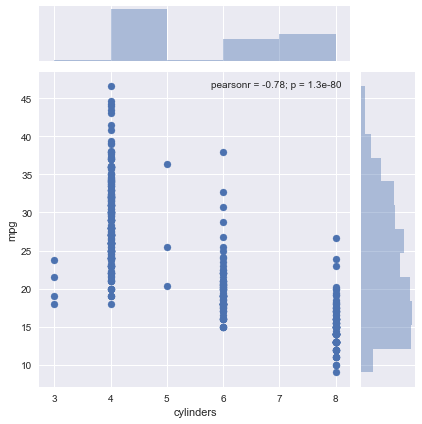

In [30]:
# seaborn scatterplot
pl = sns.jointplot(x='cylinders', y='mpg', data=Auto);

In [31]:
# changing data type of a column into category
Auto['cylinders'] = Auto['cylinders'].astype('category')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


/Users/emredjan/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


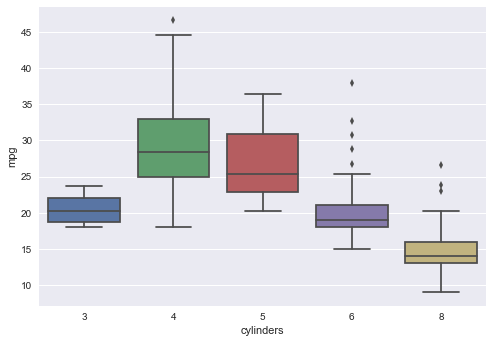

In [32]:
# seaborn boxplot implementation
sns.boxplot(x='cylinders', y='mpg', data=Auto);

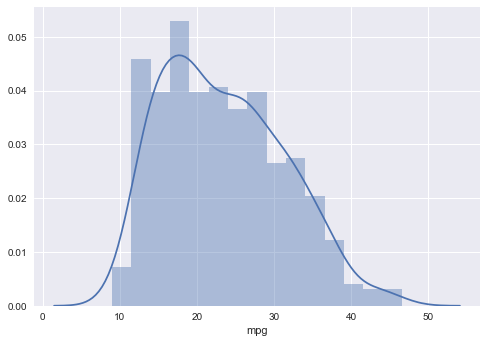

In [33]:
# seaborn enhanced histogram with density plot
sns.distplot(Auto['mpg'], bins=15);

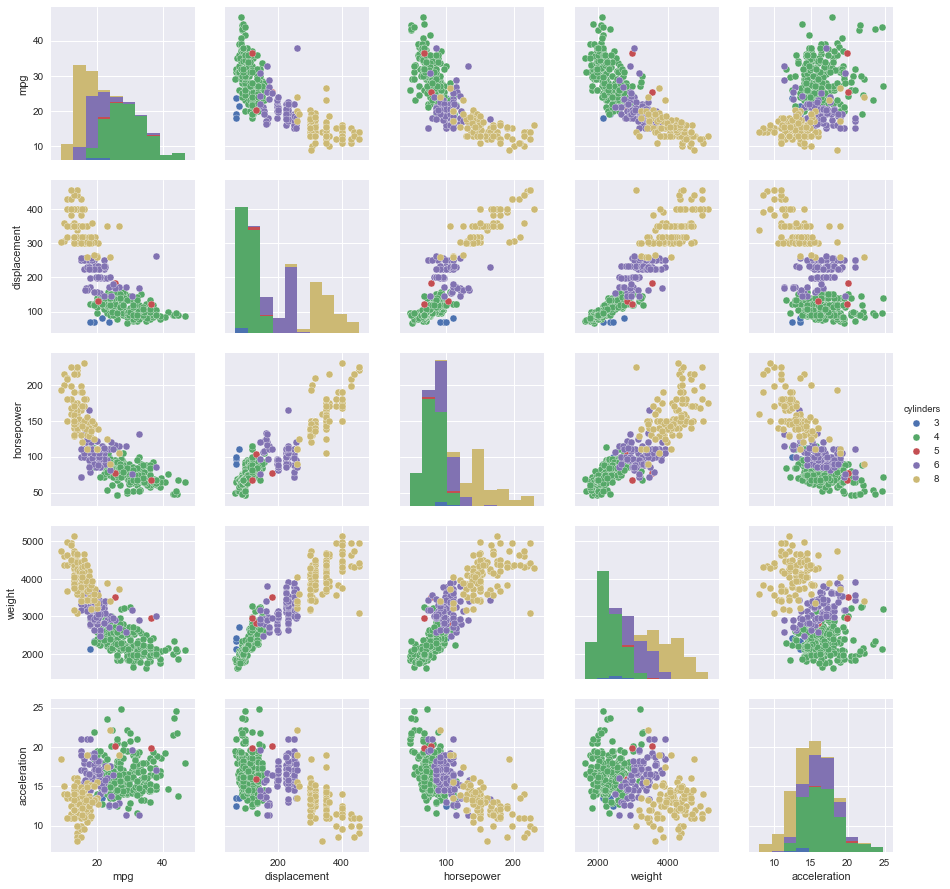

In [34]:
# seaborn pairplot for selected variables, colored by another
sns.pairplot(Auto, vars=['mpg', 'displacement', 'horsepower', 'weight', 'acceleration'], hue='cylinders');

In [35]:
# summary statistics for all dataframe columns, including non-numerical ones
Auto.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
count,392.00,392.0,392.00,392.00,392.00,392.00,392.00,392.00,392
unique,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,301
top,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,amc matador
freq,NaN,199.0,NaN,NaN,NaN,NaN,NaN,NaN,5
mean,23.45,NaN,194.41,104.47,2977.58,15.54,75.98,1.58,NaN
std,7.81,NaN,104.64,38.49,849.40,2.76,3.68,0.81,NaN
min,9.00,NaN,68.00,46.00,1613.00,8.00,70.00,1.00,NaN
25%,17.00,NaN,105.00,75.00,2225.25,13.78,73.00,1.00,NaN
50%,22.75,NaN,151.00,93.50,2803.50,15.50,76.00,1.00,NaN
75%,29.00,NaN,275.75,126.00,3614.75,17.02,79.00,2.00,NaN


In [38]:
# summary statistics for a single column
# wrapped as dataframe for pretty table display in jupyter
pd.DataFrame(Auto['mpg'].describe())

,mpg
count,392.00
mean,23.45
std,7.81
min,9.00
25%,17.00
50%,22.75
75%,29.00
max,46.60
